In [225]:
# EXPLORATORY DATA ANALYSIS


In [223]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
import altair as alt

def load(file: str):
    contents = arff.loadarff(file)
    df = pd.DataFrame(contents[0])

    classes = ['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban']
    df[classes] = df[classes].apply(lambda s: s.map(int)).to_numpy(dtype=np.float32)
    return df


def process(df: pd.DataFrame):
    attr = [col for col in df.columns if col.startswith("attr")]
    classes = ['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban']

    data = df[attr].to_numpy(dtype=np.float32)
    targets = df[classes].apply(lambda s: s.map(int)).to_numpy(dtype=np.float32)

    return data, targets

In [ ]:
df = load("scene.arff")
X, Y = process(df)

array([[1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [41]:
df.head()

attr1     attr2     attr3     attr4     attr5     attr6     attr7  \
0  0.646467  0.666435  0.685047  0.699053  0.652746  0.407864  0.150309   
1  0.770156  0.767255  0.761053  0.745630  0.742231  0.688086  0.708416   
2  0.793984  0.772096  0.761820  0.762213  0.740569  0.734361  0.722677   
3  0.938563  0.949260  0.955621  0.966743  0.968649  0.869619  0.696925   
4  0.512130  0.524684  0.520020  0.504467  0.471209  0.417654  0.364292   

      attr8     attr9    attr10  ...   attr291   attr292   attr293   attr294  \
0  0.535193  0.555689  0.580782  ...  0.157332  0.247298  0.014025  0.029709   
1  0.757351  0.760633  0.740314  ...  0.251454  0.137833  0.082672  0.036320   
2  0.849128  0.839607  0.812746  ...  0.017166  0.051125  0.112506  0.083924   
3  0.953460  0.959631  0.966320  ...  0.019267  0.031290  0.049780  0.090959   
4  0.562266  0.588592  0.584449  ...  0.198151  0.238796  0.164270  0.184290   

   Beach  Sunset  FallFoliage  Field  Mountain  Urban  
0    1.0     0.0          0.0    0.0       1.0    0.0  
1    1.0     0.0          0.0    0.0       0.0    1.0  
2    1.0     0.0          0.0    0.0       0.0    0.0  
3    1.0     0.0          0.0    0.0       0.0    0.0  
4    1.0     0.0          0.0    0.0       0.0    0.0  

[5 rows x 300 columns]

In [43]:
# Summary statistics
df.info()
print("DATASET DESCRIPTION: ", df.describe())
print("DATASET NULLS: ", df.isnull().sum().sum()) # NO NULLS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Columns: 300 entries, attr1 to Urban
dtypes: float32(6), float64(294)
memory usage: 5.5 MB
DATASET DESCRIPTION:               attr1        attr2        attr3        attr4        attr5  \
count  2407.000000  2407.000000  2407.000000  2407.000000  2407.000000   
mean      0.658669     0.694148     0.715307     0.721717     0.713643   
std       0.213751     0.198882     0.188399     0.185636     0.187857   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.534945     0.578996     0.612401     0.614904     0.608947   
50%       0.681079     0.718068     0.737771     0.743758     0.734662   
75%       0.819445     0.843483     0.857111     0.863527     0.854056   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             attr6        attr7        attr8        attr9       attr10  ...  \
count  2407.000000  2407.000000  2407.000000  2407.000000  2407.000

In [65]:
# Binary classification
df['Urban'].value_counts()



0.0    1976
1.0     431
Name: Urban, dtype: int64

In [61]:
# Multi-label distribution

multi_labels = ['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban']
df[multi_labels].apply(pd.value_counts)

Beach  Sunset  FallFoliage  Field  Mountain  Urban
0.0   1980    2043         2010   1974      1874   1976
1.0    427     364          397    433       533    431

In [103]:
# Binary classification distribution (Urban/Non-Urban)
urban_counts = df['Urban'].value_counts().reset_index()
urban_counts.columns = ['Urban', 'Count']

# Multi-label distribution
multi_labels = ['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban']
multi_label_counts = df[multi_labels].apply(pd.value_counts).fillna(0).astype(int).T
multi_label_counts.reset_index(inplace=True)
multi_label_counts.columns = ['Label', 'Class_0', 'Class_1']

# Melt the multi-label counts for Altair
multi_label_melted = multi_label_counts.melt(id_vars='Label', var_name='Class', value_name='Count')

# Altair Chart 1: Urban/Non-Urban Distribution
urban_chart = alt.Chart(urban_counts).mark_bar().encode(
    x=alt.X('Urban:N', title='Urban (0 = Non-Urban, 1 = Urban)'),
    y=alt.Y('Count:Q', title='Count'),
    color=alt.Color('Urban:N', scale=alt.Scale(scheme='category10'))
).properties(
    title='Urban vs. Non-Urban Distribution',

)

# Altair Chart 2: Multi-Label Distribution
multi_label_chart = alt.Chart(multi_label_melted).mark_bar().encode(
    x=alt.X('Label:N', title='Label', sort='-y'),
    y=alt.Y('Count:Q', title='Count'),
    color=alt.Color('Class:N', scale=alt.Scale(scheme='category20b')),
    column=alt.Column('Class:N', title='Class (0 = Negative, 1 = Positive)')
).properties(
    title='Multi-Label Class Distribution',

)

# Display Charts
urban_chart | multi_label_chart

alt.HConcatChart(...)

In [83]:
multi_labels = ['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban']

# Step 1: Calculate Label Combinations
# Create a string representation of each label combination
def get_active_labels(row):
    active_labels = [label for label, active in zip(multi_labels, row) if active == 1]
    return ', '.join(active_labels) if active_labels else 'None'

df['LabelCombination'] = df[multi_labels].apply(get_active_labels, axis=1)

# Count unique combinations
label_combinations = df['LabelCombination'].value_counts().reset_index()
label_combinations.columns = ['LabelCombination', 'Count']

# Step 2: Summary Statistics
# Total unique combinations and most common combinations
total_combinations = label_combinations.shape[0]
most_common_combination = label_combinations.iloc[0]
least_common_combination = label_combinations.iloc[-1]

print(f"Total Unique Combinations: {total_combinations}")
print(f"Most Common Combination: {most_common_combination['LabelCombination']} with {most_common_combination['Count']} occurrences")
print(f"Least Common Combination: {least_common_combination['LabelCombination']} with {least_common_combination['Count']} occurrences")

# Step 3: Visualize Label Combinations
label_combinations['Type'] = label_combinations['LabelCombination'].apply(
    lambda x: 'Basic Label' if ',' not in x and x != 'None' else 'Combination of Labels'
)

# Update the chart to sort by count and color by the new classification
combination_chart = alt.Chart(label_combinations).mark_bar().encode(
    x=alt.X('LabelCombination:N', title='Label Combination', sort='-y'),  # Sort by count in descending order
    y=alt.Y('Count:Q', title='Count'),
    color=alt.Color(
        'Type:N',
        title='Type',
        scale=alt.Scale(domain=['Basic Label', 'Combination of Labels'], range=['#1f77b4', '#ff7f0e'])
    )
).properties(
    title='Distribution of Label Combinations',
    width=600,
    height=400
)

# Step 4: Multi-Label Statistics Visualization
# Count the number of labels (active) in each combination
df['ActiveLabels'] = df[multi_labels].sum(axis=1)
active_labels_counts = df['ActiveLabels'].value_counts().reset_index()
active_labels_counts.columns = ['ActiveLabels', 'Count']

active_labels_chart = alt.Chart(active_labels_counts).mark_bar().encode(
    x=alt.X('ActiveLabels:O', title='Number of Active Labels'),
    y=alt.Y('Count:Q', title='Count'),
    # color=alt.Color('Count:Q', scale=alt.Scale(scheme='greens'))
).properties(
    title='Number of Active Labels per Combination',
    width=400,
    height=300
)

# Display charts
combination_chart & active_labels_chart

Total Unique Combinations: 15
Most Common Combination: Mountain with 405 occurrences
Least Common Combination: Beach, Field with 1 occurrences


alt.VConcatChart(...)

In [130]:
corr_matrix = df.iloc[:, :291].corr()  # Exclude label columns
print(corr_matrix)

# Step 2: Convert Correlation Matrix to Long Format for Altair
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Variable1', 'Variable2', 'Correlation']


            attr1     attr2     attr3     attr4     attr5     attr6     attr7  \
attr1    1.000000  0.911058  0.813101  0.740118  0.701258  0.648506  0.603258   
attr2    0.911058  1.000000  0.921884  0.836725  0.779892  0.707232  0.629987   
attr3    0.813101  0.921884  1.000000  0.932492  0.853771  0.769967  0.671675   
attr4    0.740118  0.836725  0.932492  1.000000  0.922520  0.820528  0.709746   
attr5    0.701258  0.779892  0.853771  0.922520  1.000000  0.920062  0.792182   
...           ...       ...       ...       ...       ...       ...       ...   
attr287 -0.013456 -0.018134 -0.021007 -0.028574 -0.023431 -0.018212 -0.001489   
attr288  0.005971 -0.001944 -0.006251 -0.005837  0.004501 -0.004548 -0.006034   
attr289 -0.001187 -0.002943 -0.004171 -0.012156 -0.007204 -0.001348 -0.000441   
attr290 -0.016198 -0.014497 -0.015060 -0.022183 -0.007648 -0.010880 -0.015395   
attr291 -0.014177 -0.018351 -0.024313 -0.031351 -0.012447 -0.013954 -0.019250   

            attr8     attr9

In [132]:
### TODO: DOESNT WORK WELL - rething solution -> scatter plot matrix maybe?
heatmap = alt.Chart(corr_long).mark_rect().encode(
    x=alt.X('Variable1:N', title='Variable 1', sort=None, axis=None),
    y=alt.Y('Variable2:N', title='Variable 2', sort=None, axis=None),
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='redyellowblue'), title='Correlation'),
    tooltip=['Variable1', 'Variable2', 'Correlation']
).properties(
    title='Correlation Matrix Heatmap',
    width=600,
    height=600
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
).configure_title(
    fontSize=16
)

heatmap

alt.Chart(...)

In [126]:
multi_labels = ['Beach', 'Sunset', 'FallFoliage', 'Field', 'Mountain', 'Urban']
df_labels = df[multi_labels]

# Step 1: Compute Correlation Matrix (Include Label Columns)
corr_matrix = df_labels.corr()

# Step 2: Convert Correlation Matrix to Long Format for Altair
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Label1', 'Label2', 'Correlation']

# Step 3: Create Heatmap
heatmap = alt.Chart(corr_long).mark_rect().encode(
    x=alt.X('Label1:N', title='Label 1', sort=None),
    y=alt.Y('Label2:N', title='Label 2', sort=None),
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='redyellowblue'), title='Correlation'),
    tooltip=['Label1', 'Label2', 'Correlation']
).properties(
    title='Correlation Matrix Heatmap for Labels',
    width=400,
    height=400
).configure_axis(
    labelFontSize=10,
    titleFontSize=12
).configure_title(
    fontSize=16
)

heatmap

alt.Chart(...)

In [140]:
df = pd.DataFrame(df, columns=[f'attr{i}' for i in range(1, 292)])

# Step 1: Calculate Mean and Standard Deviation
attr_stats = pd.DataFrame({
    'Attribute': df.columns,
    'Mean': df.mean(),
    'StdDev': df.std()
}).reset_index(drop=True)

# Step 2: Chart for Mean
mean_chart = alt.Chart(attr_stats).mark_bar().encode(
    x=alt.X('Attribute:N', title='Attribute', sort=None, axis=None),
    y=alt.Y('Mean:Q', title='Mean'),
    tooltip=['Attribute', 'Mean']
).properties(
    title='Mean of All Attributes',
    width=600,
    height=400
)

# Step 3: Chart for Standard Deviation
std_chart = alt.Chart(attr_stats).mark_bar().encode(
    x=alt.X('Attribute:N', title='Attribute', sort=None, axis=None),
    y=alt.Y('StdDev:Q', title='Standard Deviation'),
    tooltip=['Attribute', 'StdDev']
).properties(
    title='Standard Deviation of All Attributes',
    width=600,
    height=400
)

(mean_chart & std_chart)  # Display charts side by side

alt.VConcatChart(...)

In [239]:
####### EXAMINING THE DIM REDUCTION OF RESULTS
import pacmap

# TODO: PaCMAP probs best
mapper2D = pacmap.PaCMAP(n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0)
reduced2D = mapper2D.fit_transform(X)

data = pd.DataFrame({
        "Component 1": reduced2D[:, 0],
        "Component 2": reduced2D[:, 1],
        "urban": Y[:, -1],
})


scatter_plot = alt.Chart(data).mark_circle(size=60, opacity=0.5).encode(
            x=alt.X("Component 1:Q", title="Component 1", scale=alt.Scale(zero=False), axis=alt.Axis(grid=False)),
            y=alt.Y("Component 2:Q", title="Component 2", scale=alt.Scale(zero=False), axis=alt.Axis(grid=False)),
            color=alt.Color("urban:N", legend=alt.Legend(title="Is urban")),
            tooltip=["urban:N"]
        ).properties(
            # width=1000,
            title=f"Visualization of PaCMAP dimensionality reduction"
        )#.interactive()
scatter_plot

alt.Chart(...)

In [ ]:
###########################################################
# Visualizing downsampled image

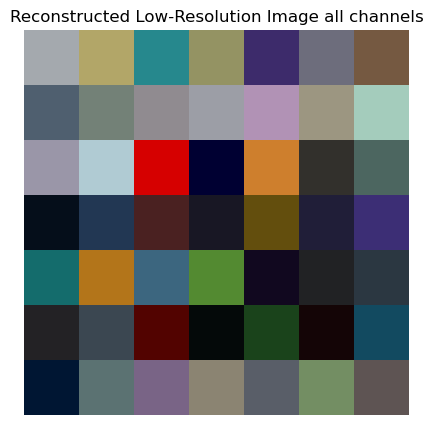

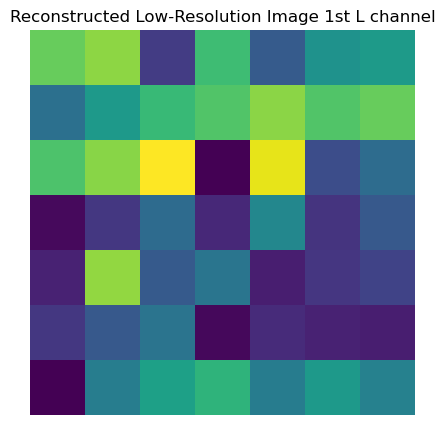

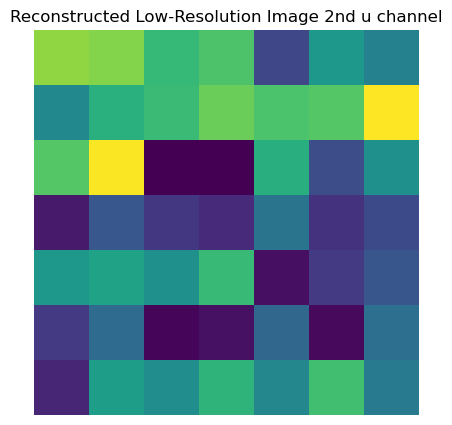

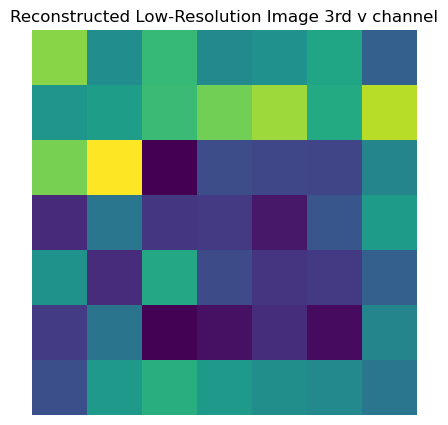

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color


# assume the first 49x3 values in the feature vector are the "mean" values for each block in Luv
feature_vector = df.iloc[0, :294]  # Example feature vector

# extract means (first moments) for L, u, v channels
luv_means = np.asarray(feature_vector[:49 * 3]).reshape(49, 3)

# reshape into 7x7 grid for each Luv channel
luv_image = luv_means.reshape(7, 7, 3) 

# Convert Luv to RGB
# rgb_image = color.luv2rgb(luv_image)

# Step 3: Visualize the Reconstructed Low-Resolution Image
plt.figure(figsize=(5, 5))
plt.imshow(luv_image)
plt.title("Reconstructed Low-Resolution Image all channels")
plt.axis("off")
plt.show()

luv_image = luv_means.reshape(7, 7, 3)[:,:,0]

# Convert Luv to RGB
# rgb_image = color.luv2rgb(luv_image)

# Step 3: Visualize the Reconstructed Low-Resolution Image
plt.figure(figsize=(5, 5))
plt.imshow(luv_image)
plt.title("Reconstructed Low-Resolution Image 1st L channel")
plt.axis("off")
plt.show()

luv_image = luv_means.reshape(7, 7, 3)[:,:,1]

# Convert Luv to RGB
# rgb_image = color.luv2rgb(luv_image)

# Step 3: Visualize the Reconstructed Low-Resolution Image
plt.figure(figsize=(5, 5))
plt.imshow(luv_image)
plt.title("Reconstructed Low-Resolution Image 2nd u channel")
plt.axis("off")
plt.show()

luv_image = luv_means.reshape(7, 7, 3)[:,:,2]

# Convert Luv to RGB
# rgb_image = color.luv2rgb(luv_image)

# Step 3: Visualize the Reconstructed Low-Resolution Image
plt.figure(figsize=(5, 5))
plt.imshow(luv_image)
plt.title("Reconstructed Low-Resolution Image 3rd v channel")
plt.axis("off")
plt.show()

# TODO: check if ok, otjerwose not meaningful

In [ ]:
####################################################################################
############## END OF EDA ##########################################################
####################################################################################

In [146]:
##################### TRYING OUT PCA
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



array([[6.75269e-01, 7.45655e-01, 7.97562e-01, ..., 2.94264e-01,
        3.27073e-01, 8.52230e-02],
       [4.71359e-01, 5.03422e-01, 5.25860e-01, ..., 1.77430e-02,
        1.28840e-02, 2.18400e-02],
       [7.78795e-01, 8.00122e-01, 8.19794e-01, ..., 1.53010e-02,
        2.73160e-02, 1.25319e-01],
       ...,
       [3.58631e-01, 4.49118e-01, 5.40661e-01, ..., 4.29720e-02,
        5.82830e-02, 8.68190e-02],
       [3.95489e-01, 4.44148e-01, 5.11326e-01, ..., 2.61690e-02,
        1.36900e-03, 2.85000e-04],
       [5.35475e-01, 6.10418e-01, 5.54566e-01, ..., 3.91720e-02,
        5.28300e-03, 7.27200e-03]], dtype=float32)

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.53      0.67        91
           1       0.94      0.80      0.87        81
           2       0.95      0.75      0.84        93
           3       0.94      0.77      0.85        79
           4       0.93      0.26      0.41        99
           5       0.89      0.46      0.61        69

   micro avg       0.93      0.59      0.72       512
   macro avg       0.93      0.60      0.71       512
weighted avg       0.93      0.59      0.70       512
 samples avg       0.62      0.60      0.61       512



C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
# X_reduced = pca.fit_transform(df.iloc[:, :291])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [164]:
importances = model.feature_importances_


In [174]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.47      0.64        91
           1       1.00      0.56      0.71        81
           2       0.94      0.68      0.79        93
           3       0.94      0.63      0.76        79
           4       0.89      0.24      0.38        99
           5       0.83      0.43      0.57        69

   micro avg       0.94      0.50      0.65       512
   macro avg       0.93      0.50      0.64       512
weighted avg       0.93      0.50      0.64       512
 samples avg       0.52      0.51      0.52       512



C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [259]:
# COMPARED TO PACMAP
from trimap import TRIMAP
import umap

mapper2D = PCA(n_components=50)
#mapper2D = pacmap.PaCMAP(n_components=50, MN_ratio=0.5, FP_ratio=2.0)
#mapper2D = TRIMAP(n_dims=50)
# mapper2D = umap.UMAP(n_components=2, metric='euclidean')
reduced2D = mapper2D.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(reduced2D, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.41      0.57        91
           1       0.98      0.57      0.72        81
           2       0.98      0.62      0.76        93
           3       0.96      0.62      0.75        79
           4       0.93      0.25      0.40        99
           5       0.88      0.43      0.58        69

   micro avg       0.95      0.48      0.64       512
   macro avg       0.95      0.48      0.63       512
weighted avg       0.95      0.48      0.63       512
 samples avg       0.50      0.49      0.49       512



C:\Users\vladi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
